## Simple Linear Regression 
* 반대말 : Multiple Linear Regression 

### Data Preprocessing (데이터전처리)
* 결측치 처리
    * 삭제, 값을 변경, 예측해서 대체
* 이상치 처리 (outlier)
    * 이상치를 검출하고 변경하는 작업
* 데이터 정규화 작업
* 학습에 필요한 컬럼을 추출, 새로 생성

W : [[0.82153248]], b: [0.82356274], loss : 1296.8897622004954
W : [[0.55961761]], b: [0.69214109], loss : 868.8681587919899
W : [[0.56124241]], b: [0.56375598], loss : 868.3186571465408
W : [[0.56286579]], b: [0.43548248], loss : 867.7701104512496
W : [[0.56448777]], b: [0.30732049], loss : 867.2225170465558
W : [[0.56610834]], b: [0.1792699], loss : 866.6758752757877
W : [[0.56772749]], b: [0.05133064], loss : 866.1301834851483
W : [[0.56934524]], b: [-0.07649741], loss : 865.5854400237235
W : [[0.57096159]], b: [-0.20421434], loss : 865.0416432434533
W : [[0.57257652]], b: [-0.33182024], loss : 864.4987914991527


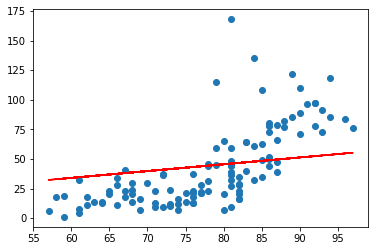

[[35.1404775]]


In [4]:
# Simple Linear Regression 
# 온도에 따른 오존량 예측
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from machine_learning_library import numerical_derivative
from my_library.machine_learning_library import numerical_derivative

# 1. Raw Data Loading
df = pd.read_csv('./data/ozone.csv')

# 2. Data Preprocessing (데이터전처리)
#    - 결측치 처리
#      - 삭제, 값을 변경(평균, 최대, 최소), 값을 예측해서 값을 대체. 
#    - 이상치 처리(outlier)
#      - 이상치를 검출하고, 변경하는 작업
#    - 데이터 정규화 작업
#    - 학습에 필요한 컬럼을 추출, 새로 생성.

# 필요한 column (Temp, Ozone만 추출)
training_data = df[['Temp', 'Ozone']] 
# print(training_data.shape) # (153, 2)

# 결치값 제거 -> 리스크가 큰 방법이지만 우선 이렇게 진행한다.
training_data = training_data.dropna(how='any')
# print(training_data.shape) # (116, 2)

# 3. Training Data Set
# 1차원 vector -> 2차원 matrix (column 하나)
x_data = training_data['Temp'].values.reshape(-1, 1)  
t_data = training_data['Ozone'].values.reshape(-1, 1)

# 4. Simple Linear Regression
#   y = Wx + b
# 구해야 하는 W, b를 정의
W = np.random.rand(1, 1)
b = np.random.rand(1)

# 5. loss function 정의
def loss_func(x, t):
    y = np.dot(x, W) + b
    return np.mean(np.power((t-y), 2)) # 최소제곱법

# 6. 학습 종료 후 예측값을 알아오는 함수
def predict(x):
    return np.dot(x, W) + b

# 7. 프로그램에서 필요한 변수들을 정의
learning_rate = 1e-5  # 추후 sklearn으로 예측한 값과 비교하며 조절
f = lambda x: loss_func(x_data, t_data)

# 8. 학습 진행
for step in range(30000):
    W -= learning_rate * numerical_derivative(f, W)
    b -= learning_rate * numerical_derivative(f, b)
    
    if step % 3000 == 0:
        # loss값은 작을 수록 좋다
        print('W : {}, b: {}, loss : {}'.format(W, b, loss_func(x_data, t_data)))
        
# 9. 그래프로 확인
plt.scatter(x_data, t_data)
plt.plot(x_data, np.dot(x_data, W) + b, color='r')
plt.show()

# 10. 예측하기 
result = predict(62)
print(result) # [[35.1404775]]

## sklearn
- sklearn을 이용해서 같은 데이터로 학습을 시키고 예측을 해 보자
- sklean은 데이터분석, 머신러닝 라이브러리중 하나로, 굉장히 유명하고 효율이 좋은 라이브러리다.

W : [[2.4287033]], b : [-146.99549097]


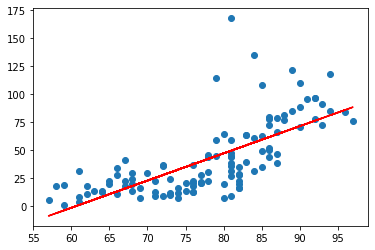

[[3.58411393]]


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# 1. Raw Data Loading
df = pd.read_csv('./data/ozone.csv')

# 2. Data Preprocessing (데이터전처리)
# 필요한 column (Temp, Ozone만 추출)
# 결치값 제거
training_data = df[['Temp', 'Ozone']] 
# print(training_data.shape) # (153, 2)

# 결치값 제거 -> 리스크가 큰 방법
training_data = training_data.dropna(how='any')
# print(training_data.shape) # (116, 2)

# 3. Training Data Set
x_data = training_data['Temp'].values.reshape(-1, 1)  # 1차원 vector -> 2차원 matrix (column 하나)
t_data = training_data['Ozone'].values.reshape(-1, 1)

# 4. sklearn을 이용해서 linear regression model 객체를 생성
# 아직 완성되지 않은, 학습되지 않는 모델 생성
model = linear_model.LinearRegression()

# 5. Training Data Set을 이용해서 학습 진행
model.fit(x_data, t_data)

# 6. W, b 값 알아내기
print('W : {}, b : {}'.format(model.coef_, model.intercept_))

# 7. 그래프로 확인하기
plt.scatter(x_data, t_data)
plt.plot(x_data,np.dot(x_data,model.coef_) + model.intercept_, color='r')
plt.show()

# 8. 예측하기
predict_val = model.predict([[62]]) # 온도를 이용해서 오존
print(predict_val) #  # [[3.58411393]]

- 이런 문제가 발생한 이유는 데이터 전처리가 잘 안되서 그렇다.
- 머신러닝에서 학습이 잘 되기 위해서는 데이터의 전처리가 필수다.

- 결측치 처리는, 여기서는 일단 삭제 처리로 한다.

### 결측치 처리
* 1) 이상치처리 (Outlier)
* 2) 데이터의 정규화

### 이상치처리 (Outlier)
>-   이상치 (Outlier)는 속성의 값이 일반적인 값보다 편차가 큰 값을 의미.
>-   즉, 데이터 전체 패턴에서 동떨어져 있는 관측치를 지칭
>-   평균뿐만 아니라 분산에도 영향을 미치기 때문에, 데이터 전체의 안정성을 저해하는 요소.
>-   따라서, 이상치는 반드시 처리하고 검출하고 처리하는데 상당히 많은 시간이 소요되는게 일반적
>-   독립변수 (온도)에 있는 이상치 -> **지대점**
>-   종속변수 (오존량)에 있는 이상치 -> **outlier**


### **1) Tukey Outlier**
> 4분위값을 이용하는 이상치 검출 방식   
### **2) Z-Score**
> 분산, 표준편차를 이용하는 이상치 검출 방법 - 통계기반

- Tukey outlier를 이용하여 처리한다.
- 우선, boxplot이라는걸 이용해서 4분위를 기준으로 한 그래프를 확인한다.

### **1) Tukey Outlier**
>- 4분위값을 이용하는 이상치 검출 방식   
>- Boxplot을 사용하여 이상치를 분류하는 기준은 IQR value를 사용
- IQR value = 3사분위 -  1사분위값
- 어떤 값을 이상치로 판별하는가
	- *1사분위수 - 1.5 * IQR value보다 작은 값*을 이상치로 판별
	- *3사분위수 + 1.5 * IQR value보다 큰 값*을 이상치로 판별

 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FAL816%2FbtqJphj5rC8%2FvinhjO3pIyiJUHqHH1UK41%2Fimg.png" width="70%">


### Boxplot과 사분위수 알아보기

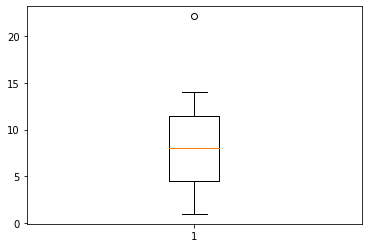

In [34]:
# Boxplot을 사용하여 이상치를 분류하는 기준은 IQR value를 사용
# IQR value = 3사분위 -  1사분위값
# 어떤 값을 이상치로 판별하는가
# 1사분위수 - 1.5 * IQR value 이 값보다 작은 값을 이상치로 판별
# 3사분위수 + 1.5 * IQR value 이 값보다 큰 값을 이상치로 판별

import numpy as np
import matplotlib.pyplot as plt

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])
plt.boxplot(data)
plt.show()

### Tukey Outlier로 이상치 처리하기
- numpy로 사분위수를 구하려면 `percentile()` 함수를 이용한다.

8.473333333333333
8.0
4.5
8.0
11.5
22.1
upper_fense : 22.0
lowerr_fense : -6.0
[22.1]


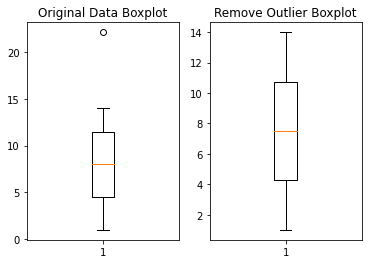

In [56]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

fig = plt.figure()               # 새로운 그림 (figure)을 생성
fig_1 = fig.add_subplot(1, 2, 1)  # 1행 2열의 subplot의 위치가 1번 위치
fig_2 = fig.add_subplot(1, 2, 2)  # 1행 2열의 subplot의 위치가 2번 위치

fig_1.set_title('Original Data Boxplot')
fig_1.boxplot(data)
# plt.show()

# numpy로 사분위수를 구하려면 percentile() 함수를 이용한다.
print(np.mean(data))             # 평균 8.473333333333333
print(np.median(data))           # 중위수 - 2사분위 8.0
print(np.percentile(data, 25))   # 1사분위 4.5 - 네등분한 값의 첫번째
print(np.percentile(data, 50))   # 2사분위 8.0 - 네등분한 값의 두번째
print(np.percentile(data, 75))   # 3사분위 11.5 - 네등분한 값의 세번째
print(np.percentile(data, 100))  # 4사분위 22.1 - 네등분한 값의 네번째


# 이상치를 검출하려면 IQR value가 필요
IQR_val = np.percentile(data, 75) - np.percentile(data, 25)

upper_fense = np.percentile(data, 75) + 1.5 * IQR_val
lower_fense = np.percentile(data, 25) - 1.5 * IQR_val

print('upper_fense : {}'.format(upper_fense))
print('lowerr_fense : {}'.format(lower_fense))
# upper_fense : 22.0
# lowerr_fense : -6.0

# 데이터중에 이상치를 출력하고
# 이상치를 제거한 데이터로 boxplot을 그린다.
# boolean indexing을 이용한다.
print(data[(data > upper_fense) | (data < lower_fense)])  # [22.1]

# 이상치가 아닌 값들의 index
# print(data[(data <= upper_fense) & (data >= lower_fense)])
result_data = data[(data <= upper_fense) & (data >= lower_fense)]

fig_2.set_title('Remove Outlier Boxplot')
fig_2.boxplot(result_data)

plt.show()

### 2) Z-Score
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FlKuc7%2FbtqJltZRLW7%2FAtoB8tMD5Qkee6ckgmbaT1%2Fimg.png" width="70%">

In [22]:
from scipy import stats

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

zscore_threshold = 1.8 # zscore outlier 임계값 (일반적으로 2)
# stats.zscore(data)
print(stats.zscore(data)) 
# 데이터를 정규분포화 시킨 후, 표준편차에서 각자의 점들이 어느 위치에 있는지 나타낸다.
# [-1.40160702 -1.21405925 -1.02651147 -0.8389637  -0.65141593 -0.46386816
#  -0.27632038 -0.08877261  0.09877516  0.28632293  0.4738707   0.66141848
#   0.84896625  1.03651402  2.55565098]

# 절대값이 1.8보다 큰 boolean mask로 indexing
outliers = data[np.abs(stats.zscore(data)) > zscore_threshold]
print(outliers) # [22.1]

# invert -> outliers의 역을 구한다.
print(data[np.isin(data, outliers, invert=True)] )
# [ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14] => 이상치 22.1 제거됨

[-1.40160702 -1.21405925 -1.02651147 -0.8389637  -0.65141593 -0.46386816
 -0.27632038 -0.08877261  0.09877516  0.28632293  0.4738707   0.66141848
  0.84896625  1.03651402  2.55565098]
[22.1]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
